In [1]:
import pandas as pd

df2015 = pd.read_csv("2015.csv")
df2016 = pd.read_csv("2016.csv")
df2017 = pd.read_csv("2017.csv")

In [2]:
df2017.head()
df2017.info()
df2017.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [3]:
df2017[['Country', 'Happiness.Score']].sort_values(by='Happiness.Score', ascending=False).head(10)
df2017[['Country', 'Happiness.Score']].sort_values(by='Happiness.Score').head(10)

,Country,Happiness.Score
154,Central African Republic,2.693
153,Burundi,2.905
152,Tanzania,3.349
151,Syria,3.462
150,Rwanda,3.471
149,Togo,3.495
148,Guinea,3.507
147,Liberia,3.533
146,South Sudan,3.591
145,Yemen,3.593


In [4]:
merged = pd.merge(df2015, df2016, on='Country', suffixes=('_2015', '_2016'))
merged['Score_Change'] = merged['Happiness Score_2016'] - merged['Happiness Score_2015']

# most increase and decrease
merged.sort_values(by='Score_Change', ascending=False)[['Country', 'Score_Change']].head(10)
merged.sort_values(by='Score_Change')[['Country', 'Score_Change']].head(10)

,Country,Score_Change
110,Liberia,-0.949
21,Venezuela,-0.726
113,Haiti,-0.490
109,Zimbabwe,-0.417
112,Sudan,-0.411
13,Mexico,-0.409
76,Nigeria,-0.393
121,Botswana,-0.358
105,Ukraine,-0.357
108,Ghana,-0.357


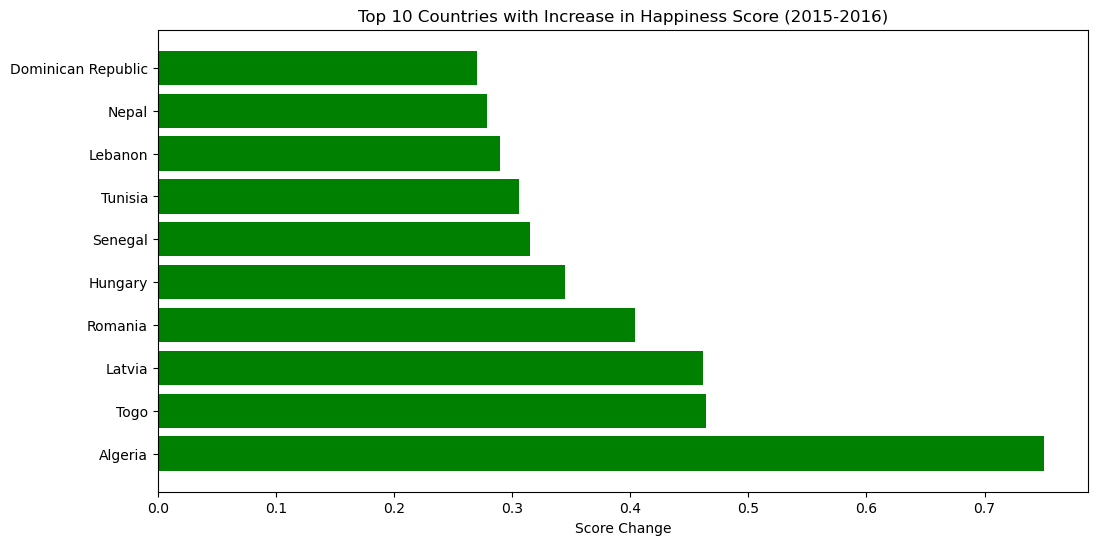

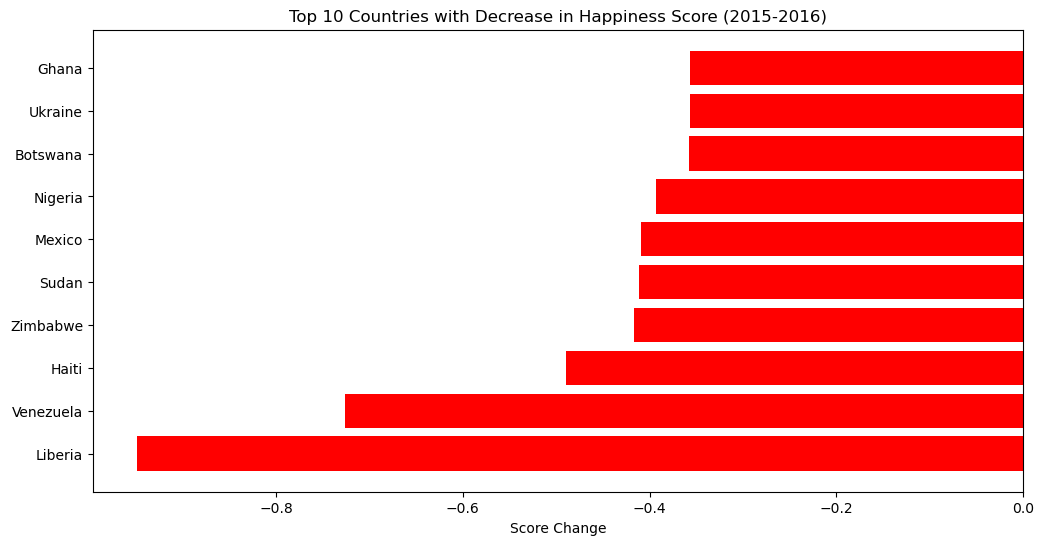

In [6]:
import matplotlib.pyplot as plt

# most increase 10 country
top_increase = merged.sort_values(by='Score_Change', ascending=False).head(10)
# most decrease 10 country
top_decrease = merged.sort_values(by='Score_Change').head(10)

plt.figure(figsize=(12,6))
plt.barh(top_increase['Country'], top_increase['Score_Change'], color='green')
plt.title("Top 10 Countries with Increase in Happiness Score (2015-2016)")
plt.xlabel("Score Change")
plt.show()

plt.figure(figsize=(12,6))
plt.barh(top_decrease['Country'], top_decrease['Score_Change'], color='red')
plt.title("Top 10 Countries with Decrease in Happiness Score (2015-2016)")
plt.xlabel("Score Change")
plt.show()

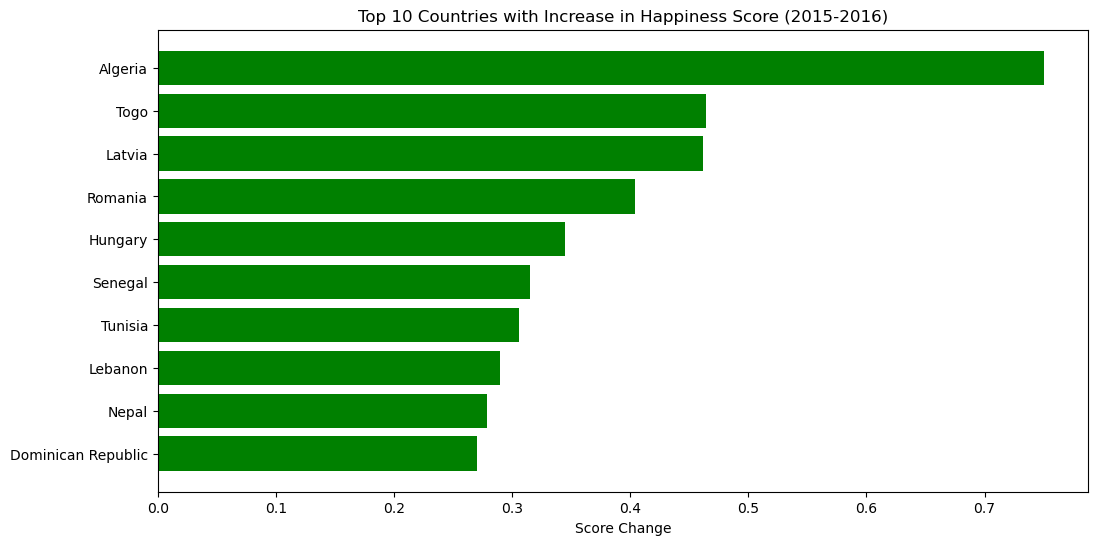

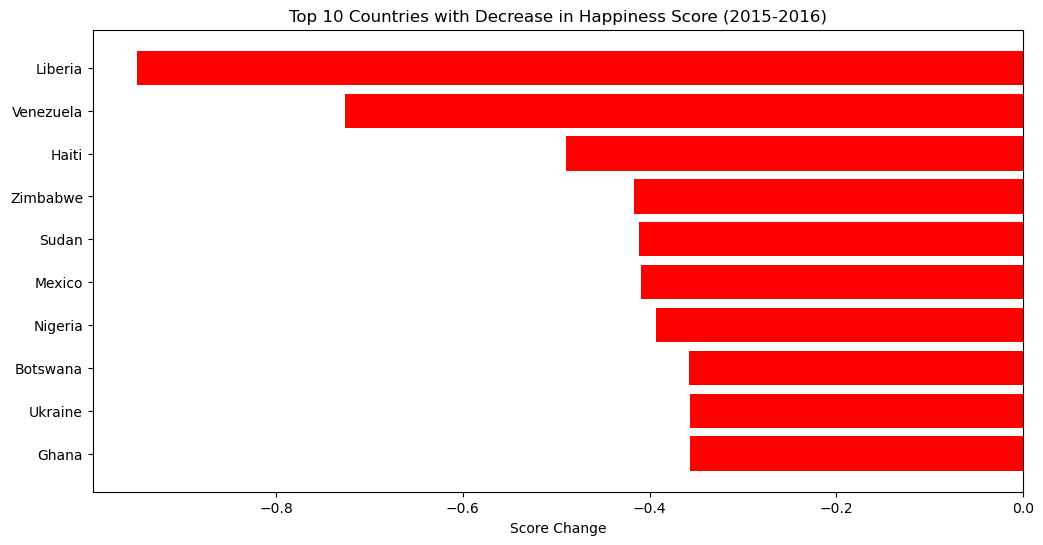

In [7]:
import matplotlib.pyplot as plt

# most increase 10 country
top_increase = merged.sort_values(by='Score_Change', ascending=False).head(10)

# most decrease 10 country
top_decrease = merged.sort_values(by='Score_Change').head(10)

# Increase graph
plt.figure(figsize=(12,6))
plt.barh(top_increase['Country'], top_increase['Score_Change'], color='green')
plt.title("Top 10 Countries with Increase in Happiness Score (2015-2016)")
plt.xlabel("Score Change")
plt.gca().invert_yaxis()
plt.show()

# DEcrease graph
plt.figure(figsize=(12,6))
plt.barh(top_decrease['Country'], top_decrease['Score_Change'], color='red')
plt.title("Top 10 Countries with Decrease in Happiness Score (2015-2016)")
plt.xlabel("Score Change")
plt.gca().invert_yaxis()
plt.show()